<a href="https://colab.research.google.com/github/Madhuanabala/breast-cancer/blob/main/trail3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [15]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Load datasets
train_file = "/content/combined_dataset_fs.csv"
test_file = "/content/combined_dataset_test.csv"

train_data = pd.read_csv(train_file)
test_data = pd.read_csv(test_file)

# Separate features and target in train dataset
target_column = "bioactivity_class"
X_train = train_data.drop(columns=[target_column])
y_train = train_data[target_column]

# Ensure test dataset has the same columns as training dataset
X_test = test_data[X_train.columns]
y_test = test_data[target_column]

# Train a Random Forest regressor
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
print(f"R² Score: {r2}")


Mean Squared Error: 0.0832934065934066
R² Score: 0.6609302199827947


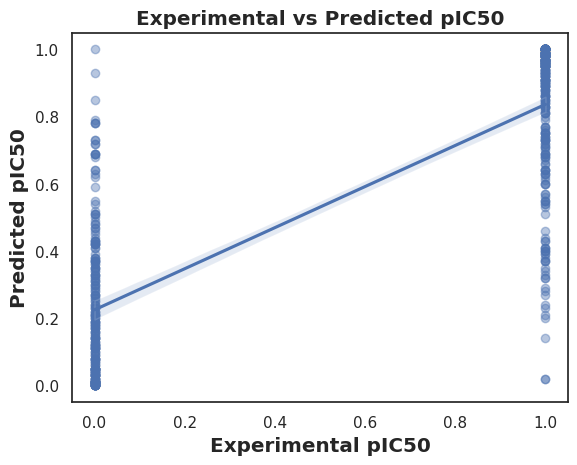

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

# Visualize the relationship between actual and predicted values
sns.set_style("white")

# Correctly specify x and y as keyword arguments
ax = sns.regplot(x=y_test, y=y_pred, scatter_kws={'alpha': 0.4})
ax.set_xlabel('Experimental pIC50', fontsize='large', fontweight='bold')
ax.set_ylabel('Predicted pIC50', fontsize='large', fontweight='bold')
ax.set_title('Experimental vs Predicted pIC50', fontsize='large', fontweight='bold')
plt.show()

In [21]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import classification_report, accuracy_score

# Load datasets
train_file = "/content/combined_dataset_fs.csv"
test_file = "/content/combined_dataset_test.csv"

train_data = pd.read_csv(train_file)
test_data = pd.read_csv(test_file)

# Specify the target column
target_column = "target"  # Replace 'target' with the actual target column name

# Preprocess the data
target_column = "bioactivity_class"
X_train = train_data.drop(columns=[target_column])
y_train = train_data[target_column]

# Ensure test dataset has the same columns as training dataset
X_test = test_data[X_train.columns]
y_test = test_data[target_column]

# Normalize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Encode target labels
label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(y_train)
y_test = label_encoder.transform(y_test)

# Convert labels to one-hot encoding
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

# Define the model
model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(y_train.shape[1], activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train,
                    validation_data=(X_test, y_test),
                    epochs=50,
                    batch_size=32,
                    verbose=1)

# Evaluate the model
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"Test Accuracy: {test_accuracy:.4f}")

# Generate predictions
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_test_classes = np.argmax(y_test, axis=1)

# Classification report
print("Classification Report:")
print(classification_report(y_test_classes, y_pred_classes))


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - accuracy: 0.6307 - loss: 0.7106 - val_accuracy: 0.7729 - val_loss: 0.4691
Epoch 2/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7681 - loss: 0.5004 - val_accuracy: 0.7912 - val_loss: 0.4297
Epoch 3/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8002 - loss: 0.4163 - val_accuracy: 0.8315 - val_loss: 0.3876
Epoch 4/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8544 - loss: 0.3293 - val_accuracy: 0.8608 - val_loss: 0.3559
Epoch 5/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8766 - loss: 0.2761 - val_accuracy: 0.8608 - val_loss: 0.3470
Epoch 6/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9032 - loss: 0.2388 - val_accuracy: 0.8700 - val_loss: 0.3351
Epoch 7/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8929 - loss: 0.2484 - val_accuracy: 0.8663 - val_loss: 0.3429
Epoch 8/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8982 - loss: 0.2329 - val_accuracy: 0.8681 - val_loss

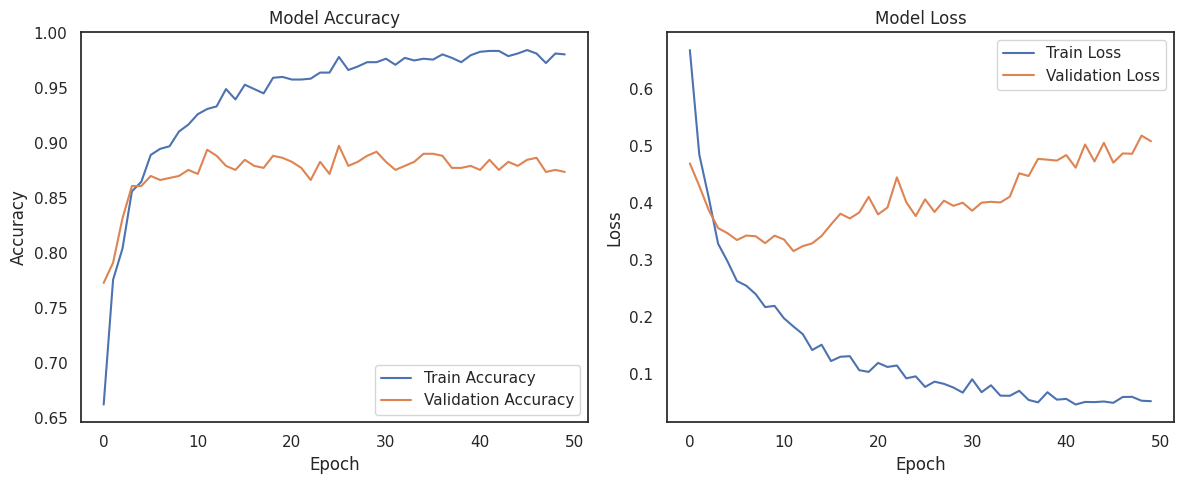

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns
# Plot training history
def plot_history(history):
    # Accuracy plot
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Model Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()

    # Loss plot
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Model Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()

    plt.tight_layout()
    plt.show()

# Call the plot function
plot_history(history)